# Holophenotype clustermap

> Fill in a module description here

In [16]:
#| default_exp 04_Holophenotype_Dendrogram

In [17]:
#| hide
from nbdev.showdoc import *

In [670]:
#| export
# import svgutils
# from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
import esploco.plotTools
from esploco.plotTools import setFont
setFont('Inter', 6)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/sangyuxu/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rcParams['svg.fonttype'] = 'none'
import pickle
%run spiral_heatmap.ipynb
import dabest
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import esploco.plotTools as plotTools
plotTools.setFont('inter', 9)

In [671]:

%matplotlib inline

paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure5/'
metapath = paperpath + 'DataforFigures/Behavior/Data/Figure5exptMeta.csv'
fullMetaData = pd.read_csv(metapath)
fullMetaData['Expt'] = fullMetaData['Expt'].str.replace('CsCh','Chr')
fullMetaData['Expt'] = fullMetaData['Expt'].str.replace(' hr',' h')
dataDict=dict()
stateDict = {'24':'Starved','48':'Starved', '0':'Fed'}
for i in range(len(fullMetaData)):
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = ['Status', 'Light'])
    data['Starvation'] = data['Starvation'].round().astype('str')
    dataDict[fullMetaData.iloc[i, 0] ]= data
    if i ==0:
        fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Ctrl'])
        fullMetaData.iloc[i, -3] = 'var'
        fullMetaData.iloc[i, -2] = 'var'

    else:
        fullMetaData.iloc[i, -3] = data['Starvation'][0]
        fullMetaData.iloc[i, -2] = stateDict[data['Starvation'][0]]
        fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Test'])
starvationhrs = dataDict['w1118'].Starvation.unique()
vectorselection = ['Volume', 'Feed Speed', 'Meal Size', 'Meal Duration', 'Duration', 'Count', 'Height', 
    'Food Port Occupancy', 'Ctrl Port Occupancy','Latency', 'Speed', 'Prefeed Speed', 'Duringfeed Speed',  'Postfeed Speed', 'Duringfeed Speed Ratio',
                   'Perifeed Speed Ratio',  
                   'Falls',
                  ]

# construct new w1118_ele
w1118base = dataDict['w1118'].loc[dataDict['w1118']['Starvation'] == '0']
w1118base1 = dataDict['w1118'].loc[dataDict['w1118']['Starvation'] == '0']
w1118base1['Starvation'] = '00'
w1118base = pd.concat([w1118base, w1118base1])

w1118base.loc[w1118base['Starvation'] == '0', 'Status'] = 'Test'
w1118base.to_csv(picklepath + 'w1118_base.csv')

w1118_24st = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='48']
w1118_24st.loc[w1118_24st['Starvation'] == '24', 'Status'] = 'Test'
w1118_24st.to_csv(picklepath + 'w1118_24st.csv')

w1118_24rv = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='48']
w1118_24rv.loc[w1118_24rv['Starvation'] == '0', 'Status'] = 'Test'
w1118_24rv.to_csv(picklepath + 'w1118_24rv.csv')

w1118_48st = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='24']
w1118_48st.loc[w1118_48st['Starvation'] == '48', 'Status'] = 'Test'
w1118_48st.to_csv(picklepath + 'w1118_48st.csv')

w1118_48rv = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='24']
w1118_48rv.loc[w1118_48rv['Starvation'] == '0', 'Status'] = 'Test'
w1118_48rv.to_csv(picklepath + 'w1118_48rv.csv')

w1118Table= [ ['baseline','w1118_base.csv','wildtype','delta','00','0',0],
            ['24 h starved','w1118_24st.csv',  'wildtype','delta','24','Fed',0],
            ['24 h reversed','w1118_24rv.csv','wildtype', 'delta','0','Starved',0],
            ['48 h starved','w1118_48st.csv', 'wildtype','delta','48','Fed',0],
            ['48 h reversed','w1118_48rv.csv','wildtype', 'delta','0', 'Starved', 0],
]
# pd.DataFrame(data = w1118Table, columns = fullMetaData.columns)
fullMetaData = pd.concat([fullMetaData.drop(fullMetaData.loc[fullMetaData.Expt == 'w1118'].index), pd.DataFrame(data = w1118Table, columns = fullMetaData.columns)]).reset_index(drop = True)
for i in fullMetaData.loc[fullMetaData['Group']=='wildtype'].index:
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = ['Status', 'Light'])
    dataDict[fullMetaData.iloc[i, 0] ]= data
fullMetaData1 = fullMetaData.drop([8, 19])


/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_41484/3305877022.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1118base1['Starvation'] = '00'


In [672]:
fullMetaData1


,Expt,File,Group,Delta Type,Starved Hours,State,Test Sample Size
0,Trhn>Chr,TrhCsCh_ele.csv,main5HT,deltadelta,24,Starved,98.0
1,R50H05>Chr,R50CsCh_ele.csv,main5HT,deltadelta,0,Fed,130.0
2,Trhn>ACR1,TrhACRRound2_ele.csv,main5HT,deltadelta,0,Fed,79.0
3,R50H05>ACR1,R50ACRRound2_ele.csv,main5HT,deltadelta,0,Fed,58.0
4,Trhn>VNC-Chr,TrhVNCCsCh_ele.csv,intersection,deltadelta,24,Starved,116.0
5,Trhn>VNC-ACR1,TrhVNCACR1_ele.csv,intersection,deltadelta,0,Fed,64.0
6,SXVNC1>Chr,SXVNC1CsCh_ele.csv,novelSplits,deltadelta,24,Starved,66.0
7,SXVNC2>Chr,SXVNC2CsCh_ele.csv,novelSplits,deltadelta,24,Starved,110.0
9,SXVNC2>ACR1,SXVNC2ACR1_ele.csv,novelSplits,deltadelta,0,Fed,28.0
10,(Trhn - R50H05)>Chr,RLTG_ele.csv,intersection,delta,24,Starved,40.0


# Take a look at the meta data for the whole dataset

In [673]:
def collectContrasts(metadata, dimension, namelist, vectorselection):
    
    expts = metadata.loc[metadata[dimension].isin(namelist)].reset_index(drop=True)
    contrasts = []
    for i in range(len(expts)):
        contrast_vector = [None]*len(vectorselection)
        print(expts.iloc[i].Expt)
        # print(metadata.loc[metadata.Expt == expts.iloc[i].Expt]['Delta Type'])
        if metadata.loc[metadata.Expt == expts.iloc[i].Expt]['Delta Type'].values[0] == 'deltadelta':
            for j in range(len(vectorselection)):
                contrast_vector[j] = dabest.load(dataDict[expts.iloc[i].Expt], x = ['Light', 'Genotype'], 
                                                     experiment = 'Status', delta2 = True, 
                                                     y = vectorselection[j], 
            #                                          x1_level=['Ctrl', 'Test'], 
                                                     experiment_label=['Ctrl', 'Test'])
            # contrast_vector[0].mean_diff.plot()
        else:
            for j in range(len(vectorselection)):
                contrast_vector[j] = dabest.load(dataDict[expts.iloc[i].Expt], x = 'Status',
                                                     y = vectorselection[j], 
                                                     idx=('Ctrl', 'Test'),)   
            # contrast_vector[0].mean_diff.plot()

        contrasts.append(contrast_vector)
    return contrasts, expts.Expt.tolist(), expts['Delta Type'].tolist(), vectorselection


In [699]:
contrasts, expt, deltaType, vectorselection = collectContrasts(fullMetaData1, 'Group', ['wildtype', 'main5HT', 'metaReview', 'intersection', 'novelSplits'], vectorselection)
expt

Trhn>Chr
R50H05>Chr
Trhn>ACR1
R50H05>ACR1
Trhn>VNC-Chr
Trhn>VNC-ACR1
SXVNC1>Chr
SXVNC2>Chr
SXVNC2>ACR1
(Trhn - R50H05)>Chr
(R50H05 - Trhn)>Chr
Trhn>Brain-Chr
NPF>Chr
NPF>ACR1
AKH3>Chr
AKH2>ACR1
Dilp2>Chr
Dilp2>ACR1
24 h starved
24 h reversed
48 h starved
48 h reversed


['Trhn>Chr',
 'R50H05>Chr',
 'Trhn>ACR1',
 'R50H05>ACR1',
 'Trhn>VNC-Chr',
 'Trhn>VNC-ACR1',
 'SXVNC1>Chr',
 'SXVNC2>Chr',
 'SXVNC2>ACR1',
 '(Trhn - R50H05)>Chr',
 '(R50H05 - Trhn)>Chr',
 'Trhn>Brain-Chr',
 'NPF>Chr',
 'NPF>ACR1',
 'AKH3>Chr',
 'AKH2>ACR1',
 'Dilp2>Chr',
 'Dilp2>ACR1',
 '24 h starved',
 '24 h reversed',
 '48 h starved',
 '48 h reversed']

In [675]:
contrasts[4][0]

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Jan  1 11:15:38 2025.

Effect size(s) with 95% confidence intervals will be computed for:
1. Red Light On Ctrl minus Red Light Off Ctrl
2. Red Light On Test minus Red Light Off Test
3. Test minus Ctrl (only for mean difference)

5000 resamples will be used to generate the effect size bootstraps.

In [676]:
def getBootstrapsAndG(contrasts, expt, deltaType, vectorselection):
    bootstrapsDf = pd.DataFrame(index = expt, columns = vectorselection)
    gDf = pd.DataFrame(index = expt, columns = vectorselection, dtype=float)
    for i in range(len(contrasts)):
        print(expt[i])
        for j in range(len(contrasts[0])):
            if deltaType[i] == 'delta':
                bootstrap = [contrasts[i][j].hedges_g.results.bootstraps[0]]
                g = contrasts[i][j].hedges_g.results.difference[0]
            elif deltaType[i] == 'deltadelta':
                bootstrap = [contrasts[i][j].delta_g.delta_delta.bootstraps_delta_delta]
                g = contrasts[i][j].delta_g.delta_delta.difference
            bootstrapsDf.loc[expt[i], vectorselection[j]] = bootstrap
            gDf.loc[expt[i], vectorselection[j]] = g
#         bootstrapsDf['Expt'] = expt[i]
#         gDf['Expt'] = expt[i]
    return bootstrapsDf, gDf
bootstrapsDf, gDf = getBootstrapsAndG(contrasts, expt, deltaType, vectorselection)

gDf  = gDf.rename(index = {'AKH3>Chr':'AKH>Chr', 'AKH2>ACR1':'AKH>ACR1'})


Trhn>Chr


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


R50H05>Chr
Trhn>ACR1


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


R50H05>ACR1
Trhn>VNC-Chr


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


Trhn>VNC-ACR1


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


SXVNC1>Chr


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


SXVNC2>Chr


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


SXVNC2>ACR1


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


(Trhn - R50H05)>Chr


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


(R50H05 - Trhn)>Chr
Trhn>Brain-Chr


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


NPF>Chr


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


NPF>ACR1


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


AKH3>Chr


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


AKH2>ACR1
Dilp2>Chr
Dilp2>ACR1


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


24 h starved


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


24 h reversed


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


48 h starved
48 h reversed


In [702]:
gDf.index


Index(['Trhn>Chr', 'R50H05>Chr', 'Trhn>ACR1', 'R50H05>ACR1', 'Trhn>VNC-Chr',
       'Trhn>VNC-ACR1', 'SXVNC1>Chr', 'SXVNC2>Chr', 'SXVNC2>ACR1',
       '(Trhn - R50H05)>Chr', '(R50H05 - Trhn)>Chr', 'Trhn>Brain-Chr',
       'NPF>Chr', 'NPF>ACR1', 'AKH>Chr', 'AKH>ACR1', 'Dilp2>Chr', 'Dilp2>ACR1',
       '24 h starved', '24 h reversed', '48 h starved', '48 h reversed'],
      dtype='object')

/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomic

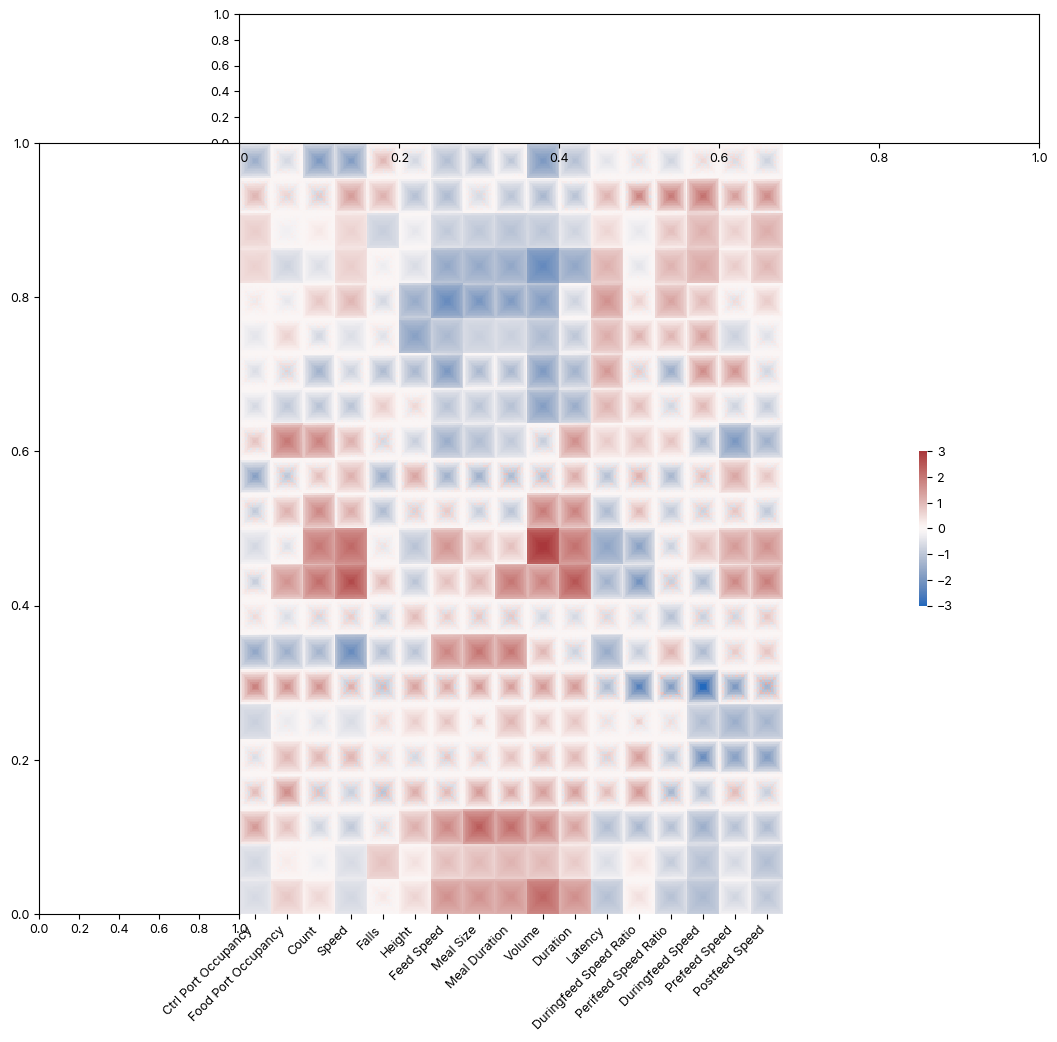

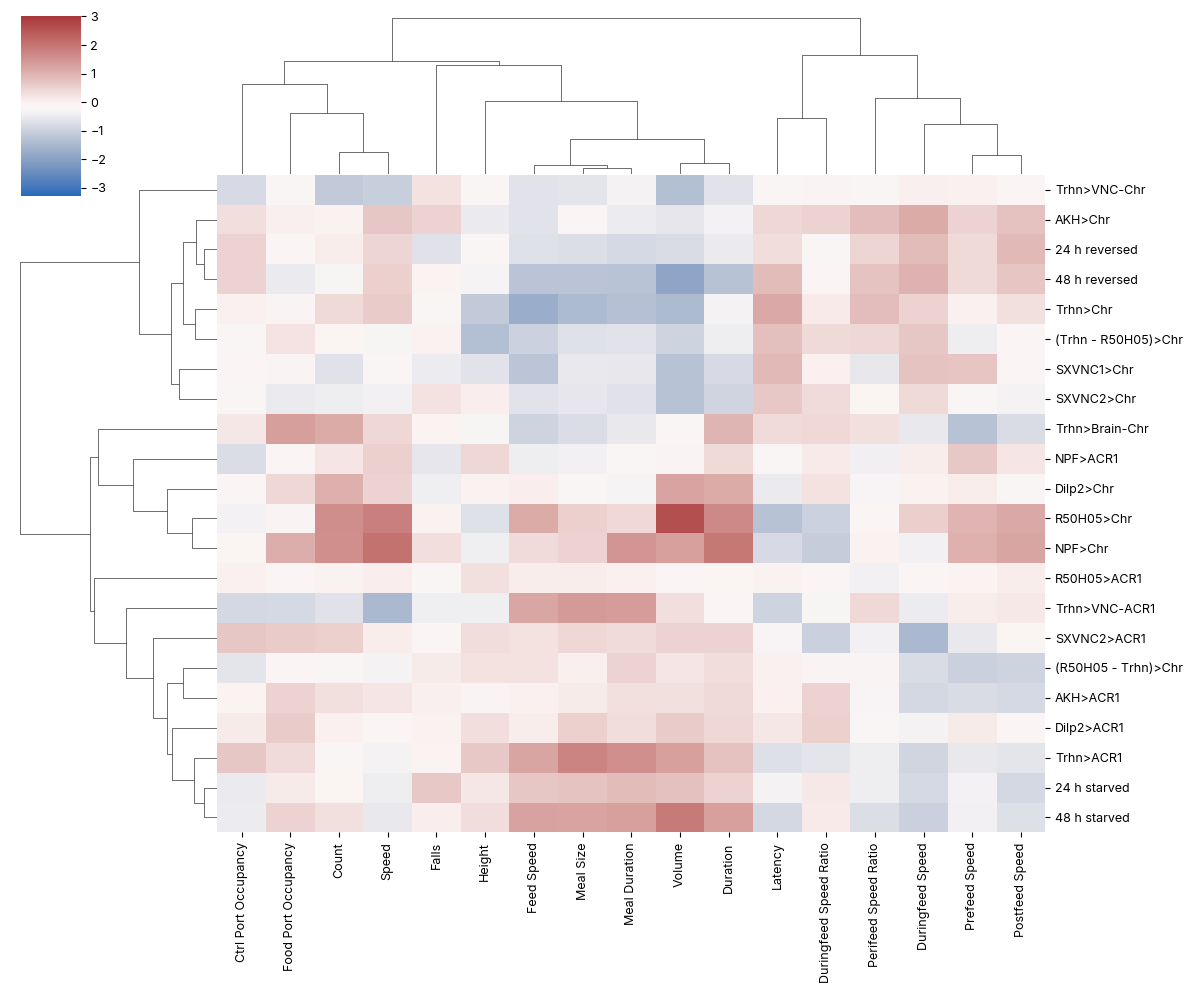

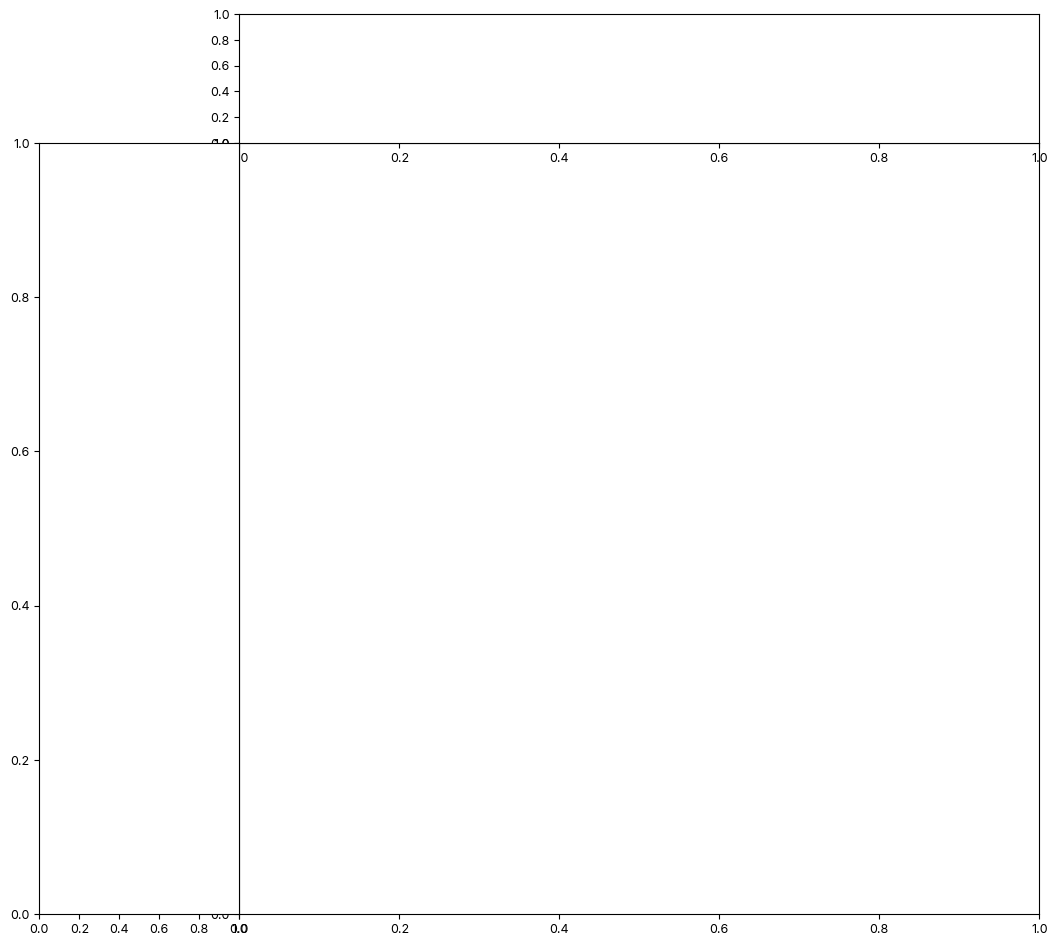

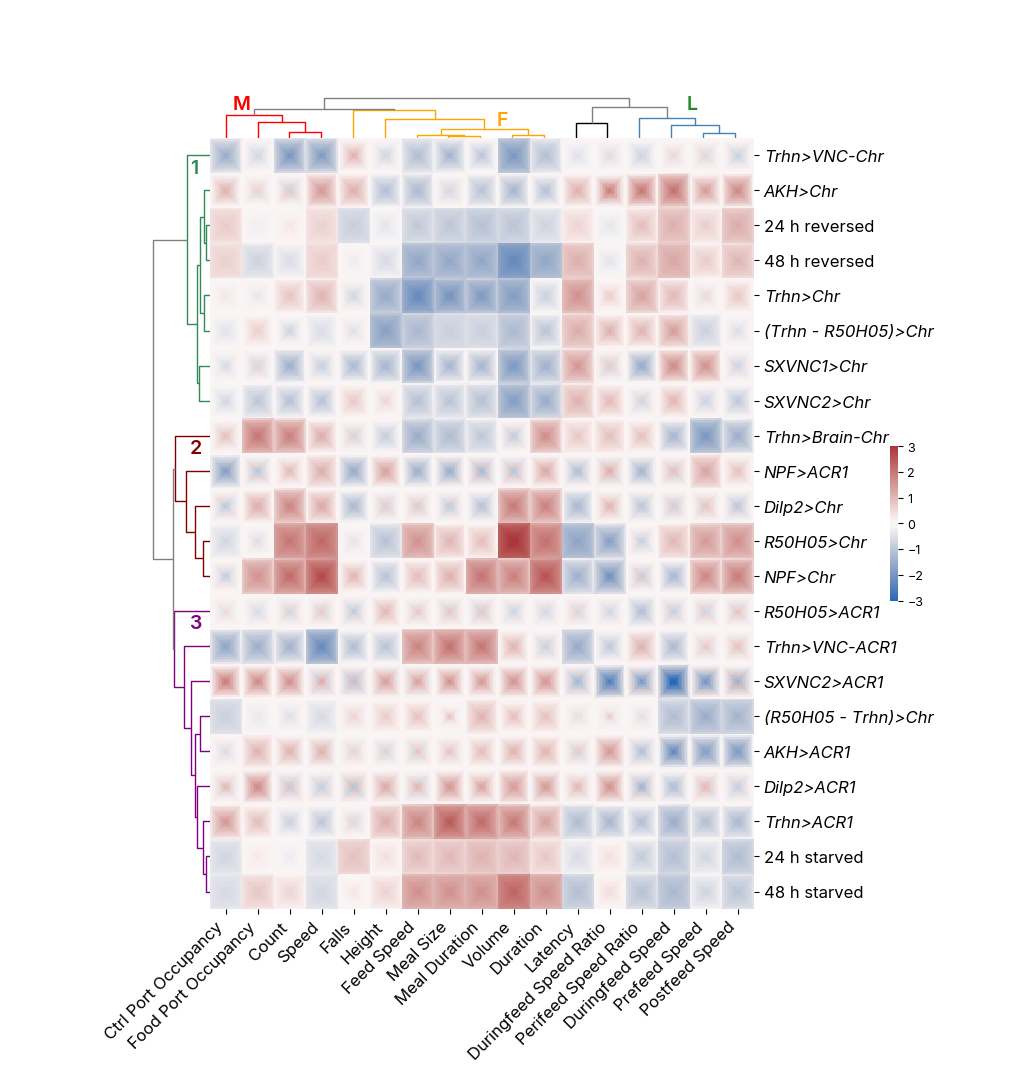

<Figure size 640x480 with 0 Axes>

In [749]:


from scipy.cluster import hierarchy

fclu = sns.clustermap(gDf, cmap='vlag',
               method = 'average',
               metric = 'correlation', 
               figsize=(12, 10), vmin=3, vmax=-3);
contrasts_new = [contrasts[i] for i in newind]
delta_types_new =  [deltaType[i] for i in newind]
contrasts_df = pd.DataFrame(data = np.array(contrasts).tolist(),columns  = vectorselection, index = gDf.index)
delta_types_df = pd.DataFrame(np.array([deltaType for i in range(len(vectorselection))]).T, columns = vectorselection,  index= gDf.index)
vectorselection_arr = [vectorselection[i] for i in fclu.dendrogram_col.reordered_ind]
expt_arr = [gDf.index[i] for i in fclu.dendrogram_row.reordered_ind]
delta_types_df_arr = rearrange_dataframe(delta_types_df, vectorselection_arr, expt_arr)
contrasts_df_arr = rearrange_dataframe(contrasts_df, vectorselection_arr, expt_arr)
Zy = hierarchy.linkage(gDf, method = 'average', metric = 'correlation');
Zx = hierarchy.linkage(gDf.T, method = 'average',  metric = 'correlation');
# Zy_ = [Zy[len(Zy)-i-1] for i in range(len(Zy))]
f = plt.figure(figsize=(10, 9));
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(1, 6),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0, hspace=0);
# Create the Axes.
ax = f.add_subplot(gs[1, 1]);
ax_denx = f.add_subplot(gs[0, 1]);
ax_deny = f.add_subplot(gs[1, 0]);

%run spiral_heatmap.ipynb

sp, mean = spiral_heatmap_ind(contrasts_df_arr, 21, 
                         expt_arr, vectorselection_arr,
                                            reverse_neg = False,   abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types_df_arr, ax =ax,);

plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
hierarchy.set_link_color_palette(['red', 'orange',  'k', 'steelblue'])
with plt.rc_context({'lines.linewidth': 1}):
    dn = hierarchy.dendrogram(Zx, ax = ax_denx,above_threshold_color='gray',color_threshold=.88,
                               );
hierarchy.set_link_color_palette(['purple', 'maroon',  'seagreen'])
with plt.rc_context({'lines.linewidth': 1}):
    dn = hierarchy.dendrogram(Zy, ax = ax_deny, above_threshold_color='gray',color_threshold=.90, orientation = 'left',distance_sort='descending'
                              );
ax_denx.text(7, .9, 'M', weight = 'semibold', color = 'red', fontsize = 14)
ax_denx.text(90, .4, 'F', weight = 'semibold', color = 'orange', fontsize = 14)
ax_denx.text(150, .9, 'L', weight = 'semibold', color = 'forestgreen', fontsize = 14)
ax_denx.set_ylim(0, 4)
ax_denx.set_xlim(0, 14.8*len(vectorselection_arr))
ax_denx.set_yticks([])
ax_denx.set_xticks([])
ax_denx.set_frame_on(False) 

ax_deny.text(.5, 210, '1', weight = 'semibold', color = 'seagreen', fontsize = 14)
ax_deny.text(.5, 130, '2', weight = 'semibold', color = 'maroon', fontsize = 14)
ax_deny.text(.5, 80, '3', weight = 'semibold', color = 'purple', fontsize = 14)

ax_deny.set_ylim(0, 10*len(expt_arr))
ax_deny.set_xlim(5,0)
ax_deny.set_yticks([])
ax_deny.set_xticks([])
ax_deny.set_frame_on(False) 
# ax.set_aspect('equal')
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), ha = 'left', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12)
xtl = ax.get_yticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
f.subplots_adjust(hspace=0)
f

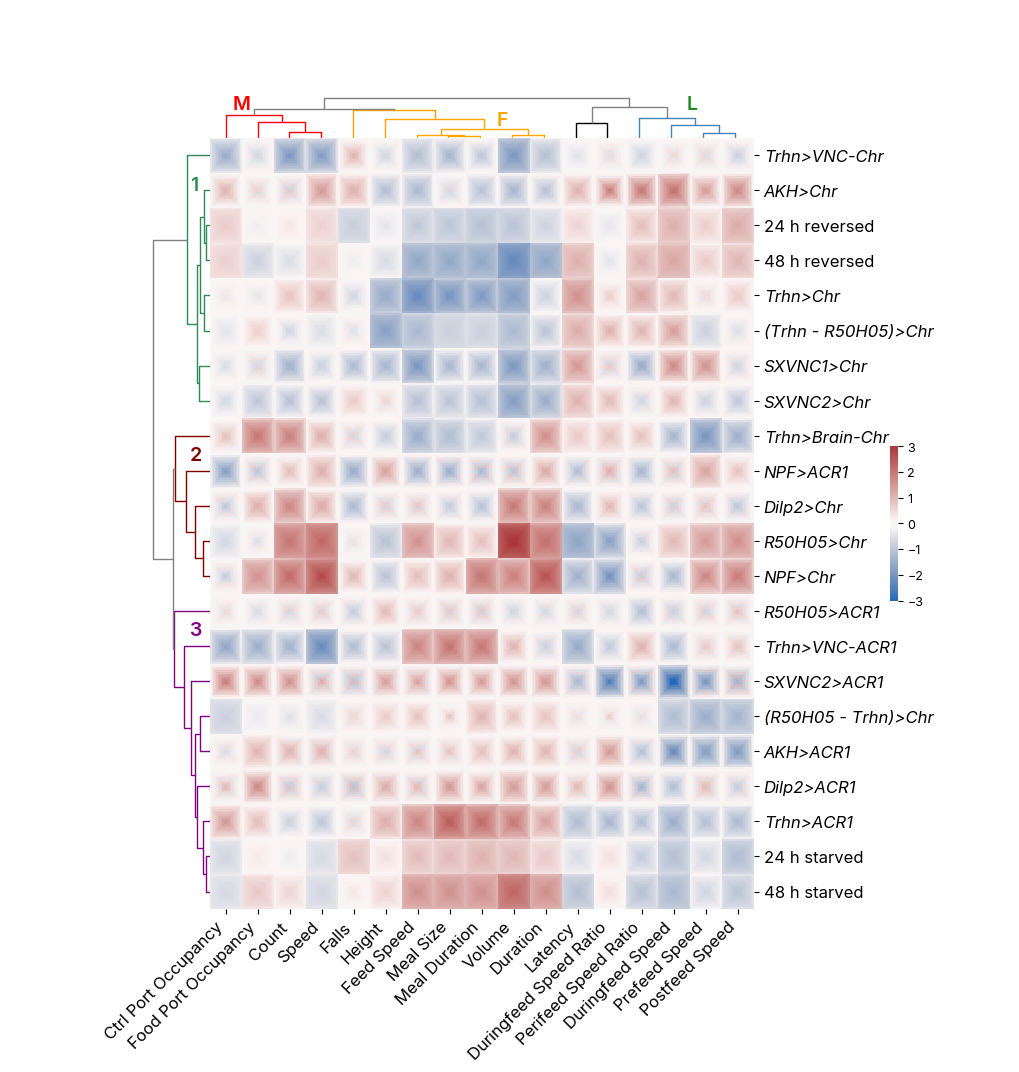

In [747]:

f

# Alternate: turn spiral heatmap around

In [168]:
fclu.dendrogram_row.reordered_ind

[8, 7, 5, 10, 16, 6, 1, 2, 3, 0, 4, 9, 14, 15, 12, 11, 13]

In [225]:
contrasts_df_arr = rearrange_dataframe(contrasts_df, expt_arr, vectorselection_arr)
len(contrasts_df_arr)

17

ValueError: too many values to unpack (expected 2)

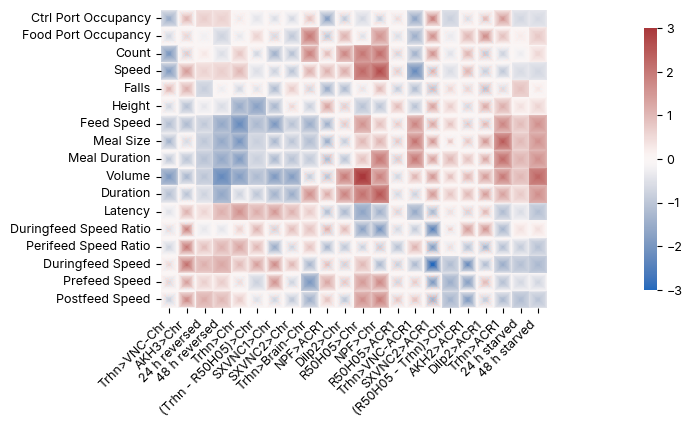

In [252]:
        
sp, mean = spiral_heatmap_ind(contrasts_df_arr, 21, vectorselection_arr, 
                         expt_arr, 
                                            reverse_neg = False,   abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types_df_arr, ax =None,);


In [208]:
import pandas as pd

def rearrange_dataframe(df, new_column_order=None, new_row_order=None):
    """
    Rearrange DataFrame columns and rows based on new indices
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    new_column_order (list): New order of column names
    new_row_order (list): New order of row indices
    
    Returns:
    pandas.DataFrame: Rearranged DataFrame
    """
    # Create a copy to avoid modifying the original
    result = df.copy()
    
    # Rearrange columns if new order is provided
    if new_column_order is not None:
        result = result[new_column_order]
    
    # Rearrange rows if new order is provided
    if new_row_order is not None:
        result = result.loc[new_row_order]
    
    return result



NameError: name 'delta_types_df' is not defined

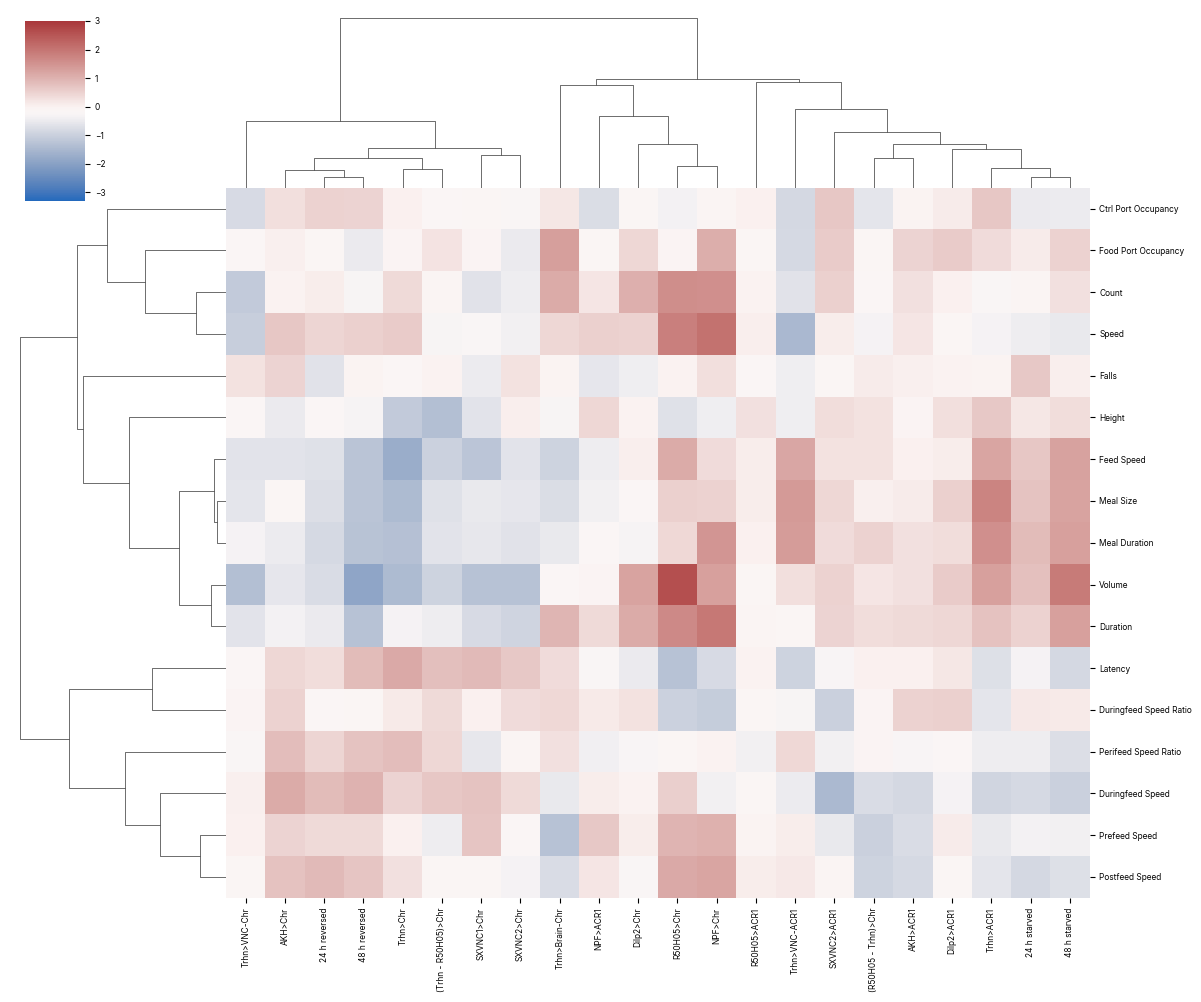

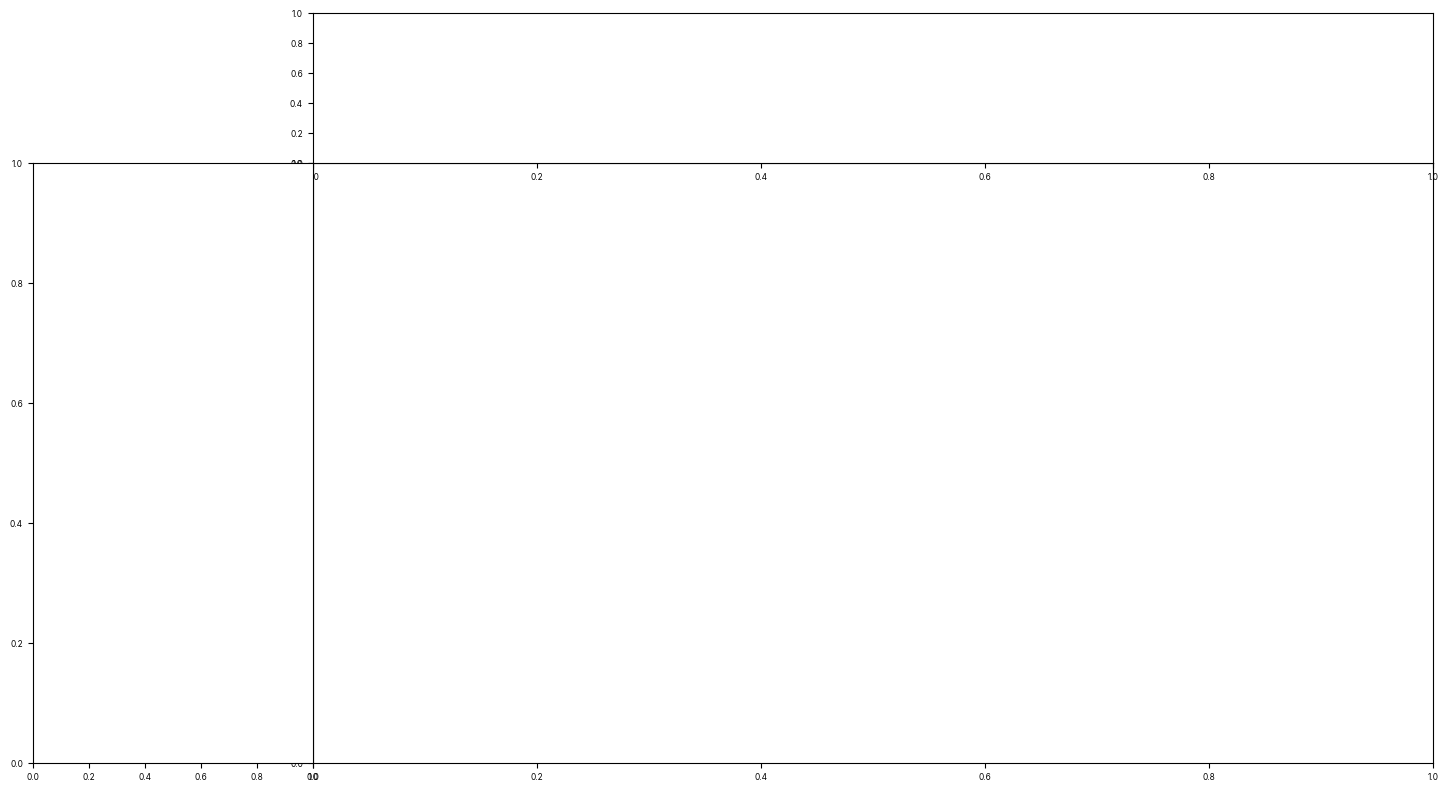

<Figure size 640x480 with 0 Axes>

In [302]:
#alternate horizontal

from scipy.cluster import hierarchy

fclu = sns.clustermap(gDf_transposed, cmap='vlag',
               method = 'average',
               metric = 'correlation', 
               figsize=(12, 10), vmin=3, vmax=-3);
# newind = fclu.dendrogram_row.reordered_ind
contrasts_df = pd.DataFrame(data = np.array(contrasts).T.tolist(), index = vectorselection, columns = expt)
delta_types_df = pd.DataFrame(np.array([deltaType for i in range(17)]), index = vectorselection, columns = expt)
vectorselection_arr = [vectorselection[i] for i in fclu.dendrogram_row.reordered_ind]
expt_arr = [expt[i] for i in fclu.dendrogram_col.reordered_ind]
delta_types_df_arr = rearrange_dataframe(delta_types_df, expt_arr, vectorselection_arr)
contrasts_df_arr = rearrange_dataframe(contrasts_df, expt_arr, vectorselection_arr)

Zy = hierarchy.linkage(gDf_transposed, method = 'average', metric = 'correlation');
Zx = hierarchy.linkage(gDf_transposed.T, method = 'average',  metric = 'correlation');
# Zy_ = [Zy[len(Zy)-i-1] for i in range(len(Zy))]
f = plt.figure(figsize=(14, 7.5));
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(1, 4),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0, hspace=0);
# Create the Axes.
ax = f.add_subplot(gs[1, 1]);
ax_denx = f.add_subplot(gs[0, 1]);
ax_deny = f.add_subplot(gs[1, 0]);

%run spiral_heatmap.ipynb

sp, mean = spiral_heatmap_ind(contrasts_df_arr, 21, vectorselection_arr, 
                         expt_arr, 
                                            reverse_neg = False,   abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types_df_arr, ax =ax,);


plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
hierarchy.set_link_color_palette(['red', 'orange',  'steelblue', 'forestgreen'])
with plt.rc_context({'lines.linewidth': 1}):
    dn = hierarchy.dendrogram(Zx, ax = ax_denx,above_threshold_color='lightgray',color_threshold=.90,
                               );
hierarchy.set_link_color_palette(['purple', 'seagreen',  'k', 'maroon'])

with plt.rc_context({'lines.linewidth': 1}):
    
    dn = hierarchy.dendrogram(Zy, ax = ax_deny, above_threshold_color='lightgray',color_threshold=.88, orientation = 'left',distance_sort='descending'
                              );
ax_denx.set_ylim(0, 2)
ax_denx.set_xlim(0, 14.8*len(expt))
ax_denx.set_yticks([])
ax_denx.set_xticks([])
ax_denx.set_frame_on(False) 
ax_deny.set_ylim(0, 10*len(vectorselection))
ax_deny.set_xlim(3,0)
ax_deny.set_yticks([])
ax_deny.set_xticks([])
ax_deny.set_frame_on(False) 
# ax.set_aspect('equal')
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), ha = 'left', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12)
xtl = ax.get_yticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
f.subplots_adjust(hspace=0)
f

f_correlation_alt = f
f_correlation_alt
f_correlation_alt.savefig(figurepath+"/ClusterCorrelation_alt.svg", bbox_inches = 'tight')
f_correlation_alt.savefig(figurepath+"/ClusterCorrelation_alt.png", bbox_inches = 'tight', dpi = 500)

In [46]:
expt_new

['SXVNC2>ACR1',
 'AKH>Chr',
 'Trhn>VNC-ACR1',
 '(R50H05 - Trhn)>Chr',
 'Dilp2>Chr',
 'SXVNC1>Chr',
 'R50H05>Chr',
 'Trhn>ACR1',
 'R50H05>ACR1',
 'Trhn>Chr',
 'Trhn>VNC-Chr',
 '(Trhn - R50H05)>Chr',
 'AKH3>Chr',
 'AKH2>ACR1',
 'NPF>Chr',
 'Trhn>Brain-Chr',
 'NPF>ACR1']

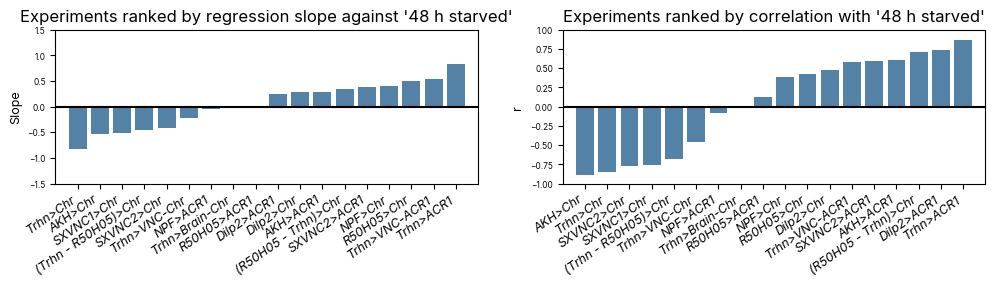

In [311]:
setFont('inter', 6)
gDfdrop = gDf.drop(index = ['24 h starved', '24 h reversed', '48 h starved', '48 h reversed'])
statsDf = pd.DataFrame(data = [], index = gDfdrop.index, columns = ['Slope', 'Intercept', 'r', 'p', 'std_err'])
import scipy
for i in gDfdrop.index:
    statsDf.loc[i, ['Slope', 'Intercept', 'r', 'p', 'std_err']] = scipy.stats.linregress(gDf.loc['48 h starved'], gDfdrop.loc[i])
f, axes = plt.subplots(1, 2)
f.set_size_inches(12, 2)
# sns.heatmap(corr_red, center=0, vmin = -1, vmax = 1, cmap = 'vlag',
#             square=True, linewidths=.5, cbar_kws={"shrink": .4,}, ax = ax)

sns.barplot(x = statsDf.sort_values(by = 'Slope', ascending = True,).index, y = statsDf.sort_values(by = 'Slope')['Slope'], ax = axes[0], color = 'steelblue')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 9, rotation = 35, ha = 'right')
axes[0].plot([-1,18], [0, 0], 'k')
axes[0].set_xlim([-1,18])
axes[0].set_ylim([-1.5,1.5])
axes[0].set_ylabel('Slope', fontsize = 9)
xtl = axes[0].get_xticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
axes[0].set_title('Experiments ranked by regression slope against \'48 h starved\'', fontsize = 12)

sns.barplot(x = statsDf.sort_values(by = 'r', ascending = True,).index, y = statsDf.sort_values(by = 'r')['r'], ax = axes[1], color = 'steelblue')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize = 9 ,rotation = 35, ha = 'right')
axes[1].plot([-1,18], [0, 0], 'k')
axes[1].set_xlim([-1,18])
axes[1].set_ylim([-1,1])
axes[1].set_ylabel('r', fontsize = 9)
xtl = axes[1].get_xticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
axes[1].set_title('Experiments ranked by correlation with \'48 h starved\'', fontsize = 12)

f.savefig(figurepath+"/corrMatrix_48.svg", bbox_inches = 'tight')
f.savefig(figurepath+"/corrMatrix_48.png", bbox_inches = 'tight', dpi = 1000)

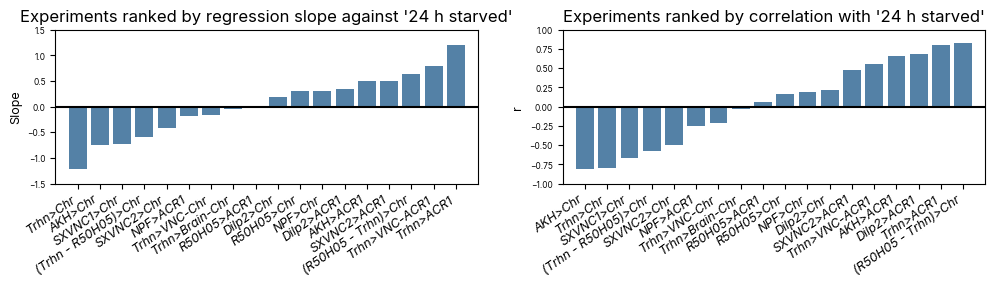

In [312]:
setFont('inter', 6)
gDfdrop = gDf.drop(index = ['24 h starved', '24 h reversed', '48 h starved', '48 h reversed'])
statsDf = pd.DataFrame(data = [], index = gDfdrop.index, columns = ['Slope', 'Intercept', 'r', 'p', 'std_err'])
import scipy
for i in gDfdrop.index:
    statsDf.loc[i, ['Slope', 'Intercept', 'r', 'p', 'std_err']] = scipy.stats.linregress(gDf.loc['24 h starved'], gDfdrop.loc[i])
f, axes = plt.subplots(1, 2)
f.set_size_inches(12, 2)
# sns.heatmap(corr_red, center=0, vmin = -1, vmax = 1, cmap = 'vlag',
#             square=True, linewidths=.5, cbar_kws={"shrink": .4,}, ax = ax)

sns.barplot(x = statsDf.sort_values(by = 'Slope', ascending = True,).index, y = statsDf.sort_values(by = 'Slope')['Slope'], ax = axes[0], color = 'steelblue')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 9, rotation = 35, ha = 'right')
axes[0].plot([-1,18], [0, 0], 'k')
axes[0].set_xlim([-1,18])
axes[0].set_ylim([-1.5,1.5])
axes[0].set_ylabel('Slope', fontsize = 9)
xtl = axes[0].get_xticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
axes[0].set_title('Experiments ranked by regression slope against \'24 h starved\'', fontsize = 12)

sns.barplot(x = statsDf.sort_values(by = 'r', ascending = True,).index, y = statsDf.sort_values(by = 'r')['r'], ax = axes[1], color = 'steelblue')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize = 9 ,rotation = 35, ha = 'right')
axes[1].plot([-1,18], [0, 0], 'k')
axes[1].set_xlim([-1,18])
axes[1].set_ylim([-1,1])
axes[1].set_ylabel('r', fontsize = 9)
xtl = axes[1].get_xticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
axes[1].set_title('Experiments ranked by correlation with \'24 h starved\'', fontsize = 12)

f.savefig(figurepath+"/corrMatrix_24.svg", bbox_inches = 'tight')
f.savefig(figurepath+"/corrMatrix_24.png", bbox_inches = 'tight', dpi = 1000)

In [ ]:
statsDf.sort_values(by = 'r')['r']

In [ ]:
sns.regplot( x = gDf.loc['48 hr reversed'], y = gDfdrop.loc['AKH3>CsCh'])
sns.regplot( x = gDf.loc['48 hr reversed'], y = gDfdrop.loc['Trh>CsCh'])


In [ ]:

fclu = sns.clustermap(gDf, cmap='vlag',
               method = 'average',
               metric = 'euclidean', 
               figsize=(12, 10), vmin=3, vmax=-3)
newind = fclu.dendrogram_row.reordered_ind
contrasts_new = [contrasts[i] for i in newind]
delta_types_new =  [deltaType[i] for i in newind]
expt_new = [expt[i] for i in newind]

Zy = hierarchy.linkage(gDf, method = 'average', metric = 'euclidean');
Zx = hierarchy.linkage(gDf.T, method = 'average',  metric = 'euclidean');
# Zy_ = [Zy[len(Zy)-i-1] for i in range(len(Zy))]
f = plt.figure(figsize=(10, 9));
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(1, 6),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0, hspace=0);
# Create the Axes.
ax = f.add_subplot(gs[1, 1]);
ax_denx = f.add_subplot(gs[0, 1]);
ax_deny = f.add_subplot(gs[1, 0]);

%run spiral_heatmap.ipynb

sp, mean = spiral_heatmap(contrasts_new, 21, expt_new, 
                         vectorselection, sort_by = fclu.dendrogram_col.reordered_ind, 
                                            reverse_neg = False,   abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types_new, ax =ax,);


plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
hierarchy.set_link_color_palette(['red', 'orange',  'steelblue', 'forestgreen'])
with plt.rc_context({'lines.linewidth': 1}):
    dn = hierarchy.dendrogram(Zx, ax = ax_denx,above_threshold_color='gray',color_threshold=4,
                               );
    dn = hierarchy.dendrogram(Zy, ax = ax_deny, above_threshold_color='gray',color_threshold=3.4, orientation = 'left',distance_sort='descending'
                              );
ax_denx.set_ylim(0, 15)
ax_denx.set_xlim(0, 250)
ax_denx.set_yticks([])
ax_denx.set_xticks([])
ax_denx.set_frame_on(False) 
ax_deny.set_ylim(0, 10*len(newind))
ax_deny.set_xlim(15,0)
ax_deny.set_yticks([])
ax_deny.set_xticks([])
ax_deny.set_frame_on(False) 
# ax.set_aspect('equal')
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), ha = 'left')
f.subplots_adjust(hspace=0)
f

In [ ]:
f_euclidean = f
f_euclidean
f_euclidean.savefig(figurepath+"/ClusterEuclidean.svg", bbox_inches = 'tight')
f_euclidean.savefig(figurepath+"/ClusterEuclidean.png", dpi = 300, bbox_inches = 'tight')

In [ ]:
from svgutils.compose import *

Figure("18cm", "24cm", 
    Panel(SVG(figurepath + 'ClusterCorrelation.svg').scale(0.025),
    Text("a", 1.2, 1, size=0.6, font = 'inter', weight='bold') ).move(-.5, -.5),
    Panel(SVG(figurepath + 'corrMatrix.svg').scale(0.022),
    Text("b", 1.2, 0.3, size=0.6, font = 'inter', weight='bold') ).move(-.5, 19),
    ).save(figurepath+"/Figure5_Correlation.svg")



In [296]:
from svgutils.compose import *

Figure("18cm", "24cm", 
    Panel(SVG(figurepath + 'ClusterCorrelation_alt.svg').scale(0.025),
    Text("a", 1.2, 1, size=0.6, font = 'inter', weight='bold') ).move(-.5, -.5),
    Panel(SVG(figurepath + 'corrMatrix.svg').scale(0.022),
    Text("b", 1.2, 0.3, size=0.6, font = 'inter', weight='bold') ).move(-.5, 19),
    ).save(figurepath+"/Figure5_Correlation_alt.svg")



##### 

In [ ]:
Figure("24cm", "30cm", 
    Panel(SVG(figurepath + 'ClusterEuclidean.svg').scale(0.03),
    Text("a", 0.2, 0.02, size=0.3, font = 'inter', weight='bold') ).move(1, 1),
    Panel(SVG(figurepath + 'corrMatrix.svg').scale(0.016),
    Text("b", 0.2, 0.02, size=0.3, font = 'inter', weight='bold') ).move(1, 15.5),
    ).save(figurepath+"/Figure5_Euclidean.svg")


In [361]:
npfcschpalette = {'npf-gal4>uas-cschrimson':'orangered', 'w1118; uas-cschrimson':'gray', 'w1118; npf-gal4':'k'}
akhcschpalette = {'akh3-gal4>uas-csch':'orangered', 'w1118; uas-cschrimson':'gray', 'w1118; akh3-gal4':'k'}
dilp2cschpalette = {'il2-gal4>uas-cschrimson':'orangered', 'w1118; uas-cschrimson':'gray', 'w1118; il2-gal4':'k'}
npfacrpalette = {'npf-gal4>uas-acr1':'seagreen', 'w1118; uas-acr1':'gray', 'w1118; npf-gal4':'k'}
akhacrpalette = {'akh2-gal4>uas-acr1':'seagreen', 'w1118; uas-acr1':'gray', 'w1118; akh2-gal4':'k'}
dilp2acrpalette = {'dilp2-gal4>uas-acr1':'seagreen', 'w1118; uas-acr1':'gray', 'w1118; dilp2-gal4':'k'}



In [362]:
metameta = fullMetaData.loc[fullMetaData['Group'] == 'metaReview']
metameta
palettes = [npfcschpalette,npfacrpalette,  akhcschpalette,  akhacrpalette, dilp2cschpalette, dilp2acrpalette]


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 10.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 51.9% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 15.6% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 7.1% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools

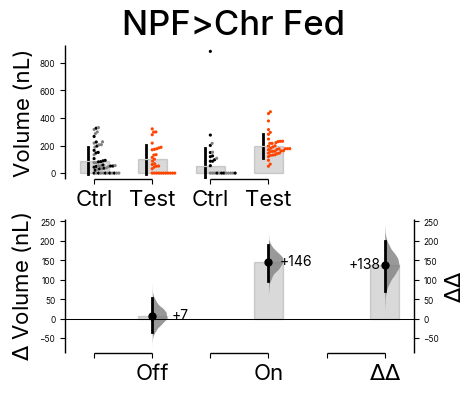

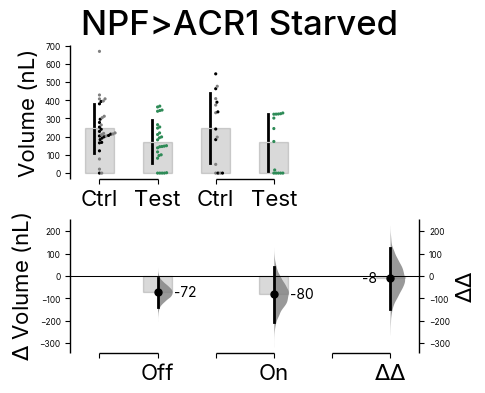

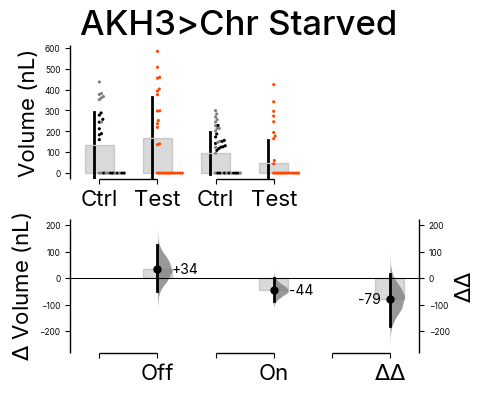

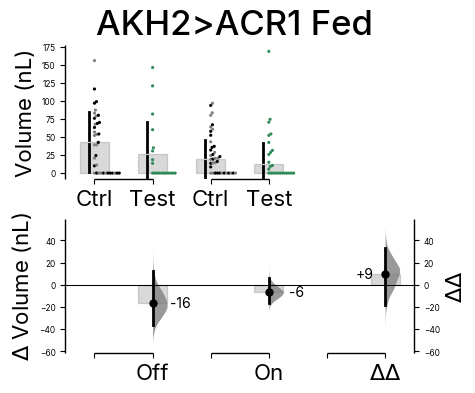

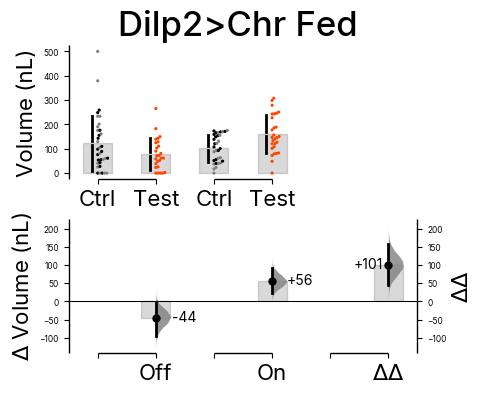

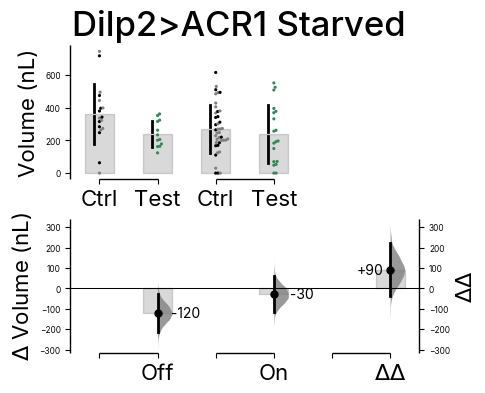

In [372]:
contrastTextFontSize = 16

for i in metameta.index.values:
    data = pd.read_csv(picklepath + metameta.loc[i, 'File']).sort_values(by = ['Status', 'Light'])
    data['Volume'] = data['Volume']*1000
    contrast = dabest.load(data, x = ['Status', 'Genotype'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
    f = contrast.mean_diff.plot(contrast_bars_kwargs= {'alpha':.15},  swarm_bars_kwargs={'alpha':.15},raw_marker_size=0.4, es_marker_size= 5, swarm_desat = 1,
                                custom_palette= palettes[i - 13], 
                                fig_size=(4.5, 4),
                                # swarm_ylim= [-10, 800], 
                                  swarm_label='Volume (nL)', contrast_label= '$\Delta$ Volume (nL)', delta2_label= '$\Delta\Delta$', 
                                  fontsize_contrastxlabel=contrastTextFontSize, 
                                   fontsize_contrastylabel= contrastTextFontSize, 
                                   fontsize_delta2label=contrastTextFontSize,
                                   fontsize_rawxlabel=contrastTextFontSize, 
                                   fontsize_rawylabel=contrastTextFontSize,
                                  delta_text = True,
                               )
    f.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
    f.axes[1].get_children()[17].set_text(f.axes[1].get_children()[17].get_text()[0:-3])
    f.axes[1].get_children()[18].set_text(f.axes[1].get_children()[18].get_text()[0:-3])
    f.axes[1].get_children()[19].set_text(f.axes[1].get_children()[19].get_text()[0:-3])

    f.suptitle(metameta.loc[i, 'Expt'] + ' ' + metameta.loc[i, 'State'], weight = 'medium',fontsize = 25, 
               # color= 'orange',
               y=.97)
    f.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
    f.savefig(figurepath+ metameta.loc[i, 'Expt']+'_Vcontrast.svg')


In [382]:
wtgBaseline = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20240202/Figure1/wtgBaseline.csv')
wtgBaseline = wtgBaseline.sort_values(by = 'M48', ascending = False).reset_index(drop = True)
wtgBaseline

,L24,L48,H24,H48,M24,M48,Metric
0,1.005100,2.249504,0.534225,1.562108,0.783153,1.910540,Volume
1,0.748393,1.616474,0.240061,0.995995,0.496642,1.298600,Duration
2,1.041300,1.562143,0.556447,0.963492,0.837757,1.278736,Meal Duration
3,0.941309,1.592879,0.403575,0.927968,0.673002,1.256454,Feed Speed
4,0.931771,1.536589,0.444615,0.932091,0.735388,1.252614,Meal Size
5,0.321926,0.759840,-0.142228,0.244774,0.105257,0.507017,Food Port Occupancy
6,0.411207,0.591171,-0.071456,0.041480,0.179191,0.321309,Height
7,0.143272,0.567540,-0.309614,0.023697,-0.088957,0.288852,Count
8,0.405269,0.418818,-0.120568,-0.189632,0.157081,0.134959,Duringfeed Speed Ratio
9,0.857034,0.327118,0.439601,-0.211326,0.651541,0.050277,Falls


In [558]:
contrasts_rearr48rank.columns

Index(['Trhn>Chr', 'R50H05>Chr', 'Trhn>ACR1', 'R50H05>ACR1', 'Trhn>VNC-Chr',
       'Trhn>VNC-ACR1', 'SXVNC1>Chr', 'SXVNC2>Chr', 'SXVNC2>ACR1',
       '(Trhn - R50H05)>Chr', '(R50H05 - Trhn)>Chr', 'Trhn>Brain-Chr',
       'NPF>Chr', 'NPF>ACR1', 'AKH3>Chr', 'AKH2>ACR1', 'Dilp2>Chr',
       'Dilp2>ACR1', '24 h starved', '24 h reversed', '48 h starved',
       '48 h reversed'],
      dtype='object')

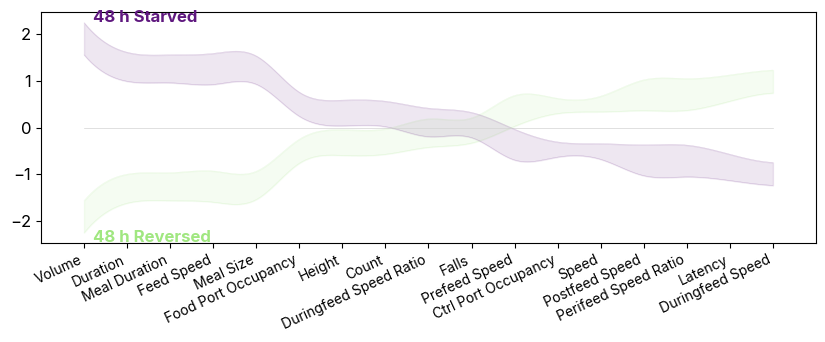

In [637]:
def prepWTbackground():
    setFont('inter', 12)
    def smooth_ribbon(x, y_l, y_h, color = 'steelblue', label = None, no_of_points = 200, ax = ax):
        from scipy.interpolate import interp1d
        x_smooth = np.linspace(x.min(), x.max(), no_of_points)
        y_h_smooth = interp1d(x, y_h, kind='cubic')(x_smooth)
        y_l_smooth = interp1d(x, y_l, kind='cubic')(x_smooth)
        ax.fill_between(x_smooth, y_l_smooth, y_h_smooth, 
                        alpha=0.1, color=color,
                        label=label)
        ax.plot(x_smooth, y_h_smooth, '-', color = color, alpha=0.2, linewidth = .2)
        ax.plot(x_smooth, y_l_smooth, '-', color = color, alpha=0.2, linewidth = .2)
    f, axes = plt.subplots(1, 1)
    axes.plot([1, len(wtgBaseline.index)], [0, 0], 'lightgray', linewidth = .5)
    f.set_size_inches(10, 3)
    smooth_ribbon(wtgBaseline.index+1, 0-wtgBaseline['H48'], 0-wtgBaseline['L48'], color = np.subtract((1, 1, 1), sns.color_palette("magma")[1]),  ax = axes)
    smooth_ribbon(wtgBaseline.index+1, wtgBaseline['H48'], wtgBaseline['L48'], color = sns.color_palette("magma")[1], ax = axes)
    axes.set_xticks(wtgBaseline.index+1, wtgBaseline['Metric'],rotation = 25, ha = 'right', fontsize = 10)
    axes.text(1.2, -2.2, '48 h Reversed',fontweight = 'bold', ha = 'left', va = 'top', color = np.subtract((1, 1, 1), sns.color_palette("magma")[1]))
    axes.text(1.2, 2.2, '48 h Starved', fontweight = 'bold', ha = 'left', va = 'bottom',color = sns.color_palette("magma")[1])
    axes.set_xlim(0, 18)
    return f, axes
f, axes = prepWTbackground()


In [633]:
print(contrasts_rearr48rank.columns)
for i in pairstodo:
    print(contrasts_rearr48rank.columns[i])

Index(['Trhn>Chr', 'R50H05>Chr', 'Trhn>ACR1', 'R50H05>ACR1', 'Trhn>VNC-Chr',
       'Trhn>VNC-ACR1', 'SXVNC1>Chr', 'SXVNC2>Chr', 'SXVNC2>ACR1',
       '(Trhn - R50H05)>Chr', '(R50H05 - Trhn)>Chr', 'Trhn>Brain-Chr',
       'NPF>Chr', 'NPF>ACR1', 'AKH3>Chr', 'AKH2>ACR1', 'Dilp2>Chr',
       'Dilp2>ACR1', '24 h starved', '24 h reversed', '48 h starved',
       '48 h reversed'],
      dtype='object')
Index(['R50H05>Chr', 'R50H05>ACR1'], dtype='object')
Index(['Trhn>ACR1', 'Trhn>Chr'], dtype='object')
Index(['Trhn>VNC-ACR1', 'Trhn>VNC-Chr'], dtype='object')
Index(['SXVNC2>ACR1', 'SXVNC2>Chr'], dtype='object')
Index(['NPF>Chr', 'NPF>ACR1'], dtype='object')
Index(['AKH3>Chr', 'AKH2>ACR1'], dtype='object')
Index(['Dilp2>Chr', 'Dilp2>ACR1'], dtype='object')


1
0
4
8
12
14
16


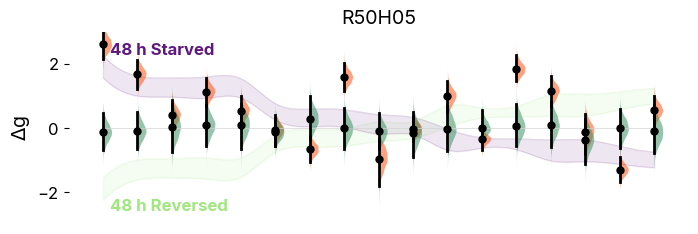

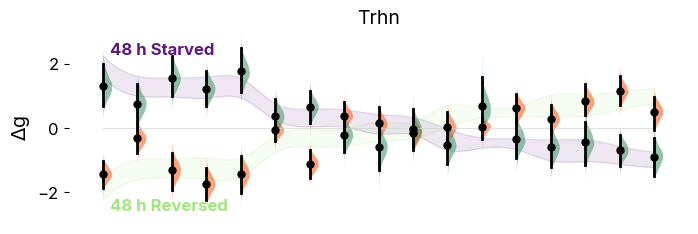

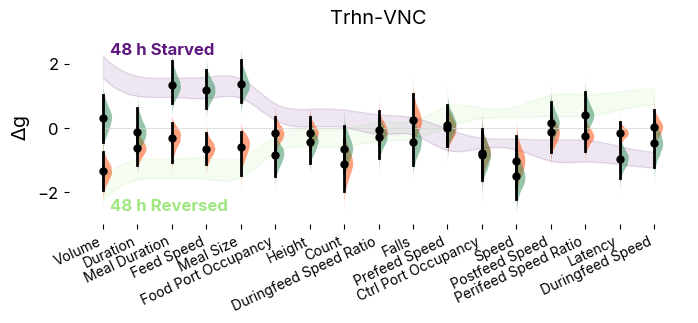

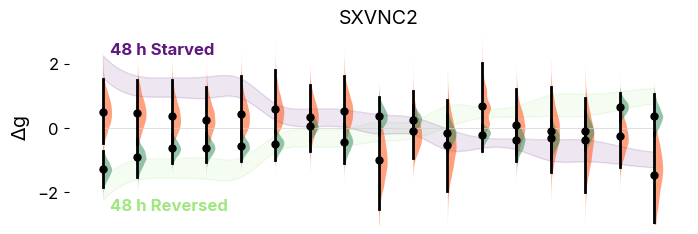

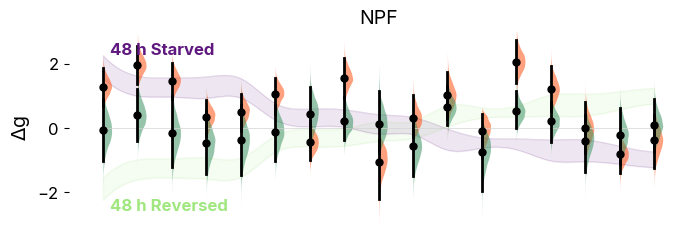

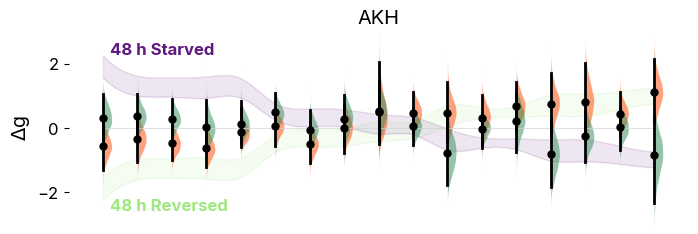

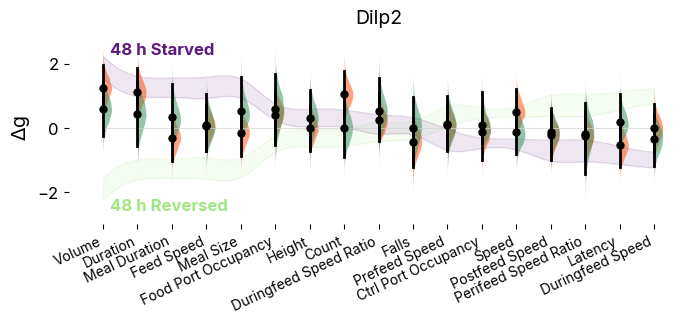

In [665]:
pairstodo = [[1, 3], [0, 2], [4, 5], [8, 7 ], [12, 13 ], [14, 15 ], [16, 17 ]]

for i in pairstodo:
    f, axes = prepWTbackground()
    print(i[0])
    for transgene in contrasts_rearr48rank.columns[[i[0]]]:
        contrasts_rearr48rank = contrasts_df.loc[wtgBaseline.Metric]
        cs = contrasts_rearr48rank.loc[:, transgene]
        from dabest.forest_plot import forest_plot
        forest_plot(cs.values.tolist(), contrast_labels =contrasts_rearr48rank.index, 
                    effect_size='delta_g', title=transgene.split('>')[0], 
                    ax = axes,alpha_violin_plot=.5, ci_line_width=2, marker_size=10,ylabel='$\Delta$g'
                   )
        [v.set_facecolor('orangered') for v in axes.get_children()[9:26]]
        
    for transgene in contrasts_rearr48rank.columns[[i[1]]]:
        contrasts_rearr48rank = contrasts_df.loc[wtgBaseline.Metric]
        cs = contrasts_rearr48rank.loc[:, transgene]
        from dabest.forest_plot import forest_plot
        forest_plot(cs.values.tolist(), contrast_labels =contrasts_rearr48rank.index, 
                    effect_size='delta_g', title=transgene.split('>')[0], 
                    ax = axes,alpha_violin_plot=.5, ci_line_width=2, marker_size=10,ylabel='$\Delta$g',fontsize=14,
                   )
        [v.set_facecolor('seagreen') for v in axes.get_children()[60:77]]
    axes.set_xticks([])
    if axes.get_title() == 'AKH2':
        transgene = 'AKH'
        axes.set_title(transgene)
    if i == [4, 5]:
        transgene = 'Trhn-VNC'
        axes.set_title(transgene)

    if i ==[16, 17] or i == [4, 5]:
        axes.set_xticks(wtgBaseline.index+1, wtgBaseline['Metric'],rotation = 25, ha = 'right', fontsize = 10)
    axes.set_ylim(-3, 3)
    f.set_size_inches(8, 2.5)
    f.savefig(figurepath + transgene.split('>')[0] + 'transgenic_ribbon.png', dpi = 300)
    f.savefig(figurepath + transgene.split('>')[0] + 'transgenic_ribbon.svg', dpi = 300)

In [557]:
contrasts_rearr48rank

,Trhn>Chr,R50H05>Chr,Trhn>ACR1,R50H05>ACR1,Trhn>VNC-Chr,Trhn>VNC-ACR1,SXVNC1>Chr,SXVNC2>Chr,SXVNC2>ACR1,(Trhn - R50H05)>Chr,...,NPF>Chr,NPF>ACR1,AKH3>Chr,AKH2>ACR1,Dilp2>Chr,Dilp2>ACR1,24 h starved,24 h reversed,48 h starved,48 h reversed
Volume,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...
Duration,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...
Meal Duration,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...
Feed Speed,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...
Meal Size,DABEST v2024.03.29\n==================\n ...,DABEST v2024.03.29\n==================\n ...,DABE

In [393]:
from svgutils.compose import *

Figure("18cm", "24cm", 
    Panel(SVG(figurepath + 'NPF>Chr_Vcontrast.svg').scale(0.025),
    Text("A", 0, .5, size=0.6, font = 'inter', weight='bold') ).move(0, 0),
    Panel(SVG(figurepath + 'NPF>ACR1_Vcontrast.svg').scale(0.025),
    Text("B", 0, .5, size=0.6, font = 'inter', weight='bold') ).move(9, 0),
    Panel(SVG(figurepath + 'AKH3>Chr_Vcontrast.svg').scale(0.025),
    Text("C", 0, .5, size=0.6, font = 'inter', weight='bold') ).move(0, 8),
    Panel(SVG(figurepath + 'AKH2>ACR1_Vcontrast.svg').scale(0.025),
    Text("D", 0, .5, size=0.6, font = 'inter', weight='bold') ).move(9, 8),
    Panel(SVG(figurepath + 'Dilp2>Chr_Vcontrast.svg').scale(0.025),
    Text("E", 0,.5, size=0.6, font = 'inter', weight='bold') ).move(0, 16),
    Panel(SVG(figurepath + 'Dilp2>ACR1_Vcontrast.svg').scale(0.025),
    Text("F", 0, .5, size=0.6, font = 'inter', weight='bold') ).move(9, 16),
    ).save(figurepath+"/FigSuppMeta.svg")



In [667]:
from svgutils.compose import *

Figure("24cm", "15cm", 
    Panel(SVG(figurepath + 'Trhntransgenic_ribbon.svg').scale(0.023),
    Text("A", 0.5, .5, size=0.5, font = 'inter', weight='bold') ).move(0, 1),
    Panel(SVG(figurepath + 'R50H05transgenic_ribbon.svg').scale(0.023),
    Text("B", 0.5, .5, size=0.5, font = 'inter', weight='bold') ).move(0, 5),
    Panel(SVG(figurepath + 'Trhn-VNCtransgenic_ribbon.svg').scale(0.023),
    Text("C", 0.5,.5, size=0.5, font = 'inter', weight='bold') ).move(0, 9),
    Panel(SVG(figurepath + 'AKHtransgenic_ribbon.svg').scale(0.023),
    Text("D", 0.5, .5, size=0.5, font = 'inter', weight='bold') ).move(11.5, 1),
    Panel(SVG(figurepath + 'NPFtransgenic_ribbon.svg').scale(0.023),
    Text("E", 0.5, .5, size=0.5, font = 'inter', weight='bold') ).move(11.5, 5),
    Panel(SVG(figurepath + 'Dilp2transgenic_ribbon.svg').scale(0.023),
    Text("F", 0.5,.5, size=0.5, font = 'inter', weight='bold') ).move(11.5, 9),
    ).save(figurepath+"/FigSuppMetaRibbon.svg")



In [651]:
contrasts_rearr48rank.columns[[1, 3]]

Index(['R50H05>Chr', 'R50H05>ACR1'], dtype='object')

In [512]:
axes.get_children()[6:22]